In [1]:
import numpy as np
import pandas as pd
from scipy import spatial, stats, cluster
import matplotlib.pyplot as plt
import seaborn as sns
import nibabel as nib
from nilearn import plotting, input_data
from nilearn.datasets import fetch_atlas_schaefer_2018
import networkx as nx
import matplotlib.cm as mplcm
import matplotlib.colors as colors
import bct
import glob
import community as community_louvain
import matplotlib.cm as cm
from sklearn.metrics import adjusted_rand_score
import os
import random


%matplotlib inline

# Styles
sns.set_context('poster')
sns.set_style('darkgrid')

plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower


In [2]:
filename = '../resources/DataSujetos/N1_suj1.csv'
df = pd.read_csv(filename, header=None)
n = df.shape[0]
aristas_posibles = (n*n-1)//2
df -= np.diag(np.ones(n))
filename = '../resources/DataSujetos/W_suj1.csv'
df_w = pd.read_csv(filename, header=None)
df_w -= np.diag(np.ones(n))

In [3]:
def subjectmatrix2graphslist(filename, densities):
    """
    Toma un archivo csv con la matriz de input y devuelve una lista de grafos con la densisdad de aristas correspondiente
    """
    
    correlation_matrix = pd.read_csv(filename, header=None)
    n = correlation_matrix.shape[0]
    correlation_matrix -= np.diag(np.ones(n))
    max_links = (n*n-n)//2
    tril_idx = np.tril_indices(n,-1)
    sorted_correlations = sorted(correlation_matrix.values[tril_idx].flatten(),reverse=True)
    
    Gs = []
    for d in densities:
        idx = int(d*max_links)
        threshold = sorted_correlations[idx]
        Gs.append(nx.from_pandas_adjacency(correlation_matrix>=threshold))
        
    return Gs

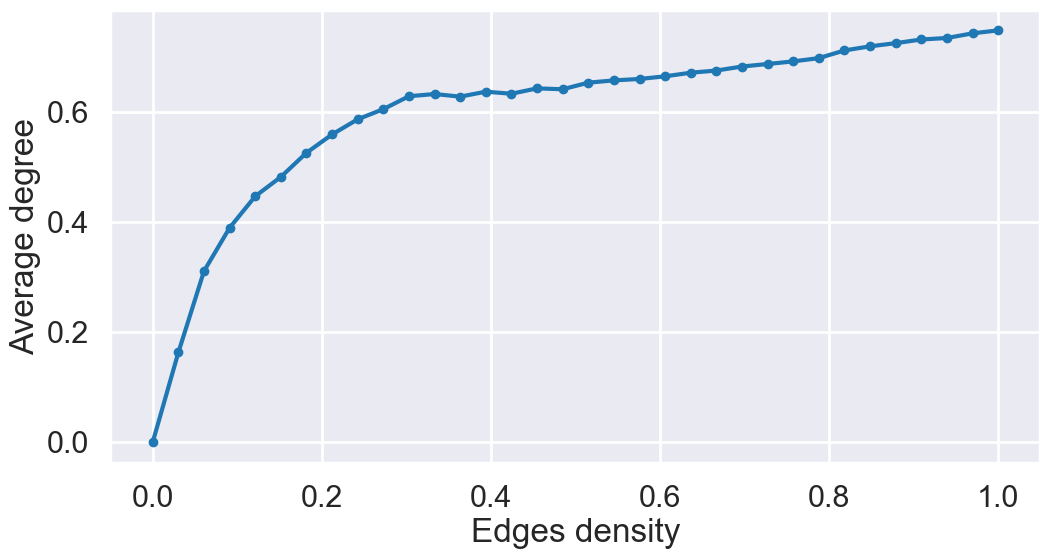

In [4]:
sort_corrs = sorted(df.values.flatten(),reverse=True)
avg_clustering = []
ds = np.arange(0,(n*n-n)//2,200)
for d in ds:
    u = sort_corrs[d]
    G = nx.from_pandas_adjacency(df>=u)
    avg_clustering_ = nx.average_clustering(G)
    avg_clustering.append(avg_clustering_)
    
plt.plot(ds/ds.max(),avg_clustering,'.-')
plt.xlabel('Edges density')
plt.ylabel('Average degree');

In [5]:
sort_corrs[300]

0.78922

In [6]:
aristas_posibles= (n*n-n)//2
aristas_posibles*0.15 #Busco cantidad tal que densidad sea 0.15

1000.5

### Sujeto 1: N1 vs W

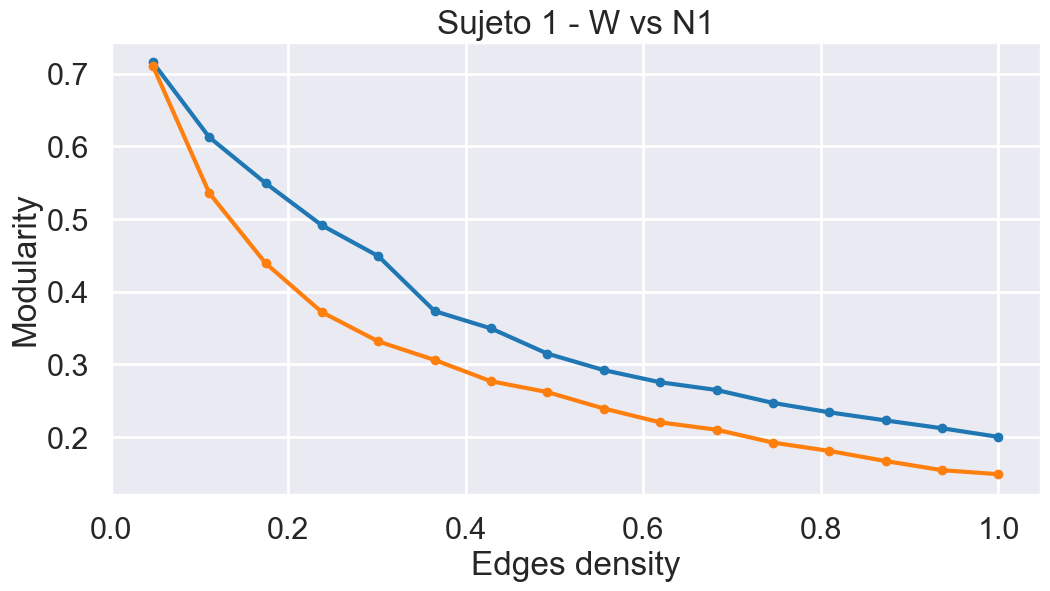

In [7]:
sort_corrs = sorted(df.values.flatten(),reverse=True)
sort_corrs_w = sorted(df_w.values.flatten(),reverse=True)
modularity = []
modularity_w = []

ds = np.arange(300,(n*n-n)//2,400)
for d in ds:
    u = sort_corrs[d]
    G = nx.from_pandas_adjacency(df>=u)
    modulos = community_louvain.best_partition(G)
    modularity_ = community_louvain.modularity(modulos,G)
    modularity.append(modularity_)
    
    u_w = sort_corrs_w[d]
    G_w = nx.from_pandas_adjacency(df_w>=u_w)
    modulos = community_louvain.best_partition(G_w)
    modularity_ = community_louvain.modularity(modulos,G_w)
    modularity_w.append(modularity_)
    
plt.plot(ds/ds.max(),modularity,'.-')
plt.plot(ds/ds.max(),modularity_w,'.-')
plt.title('Sujeto 1 - W vs N1')
plt.xlabel('Edges density')
plt.ylabel('Modularity');

### Sujeto 1: N1 vs W, cambio de escala

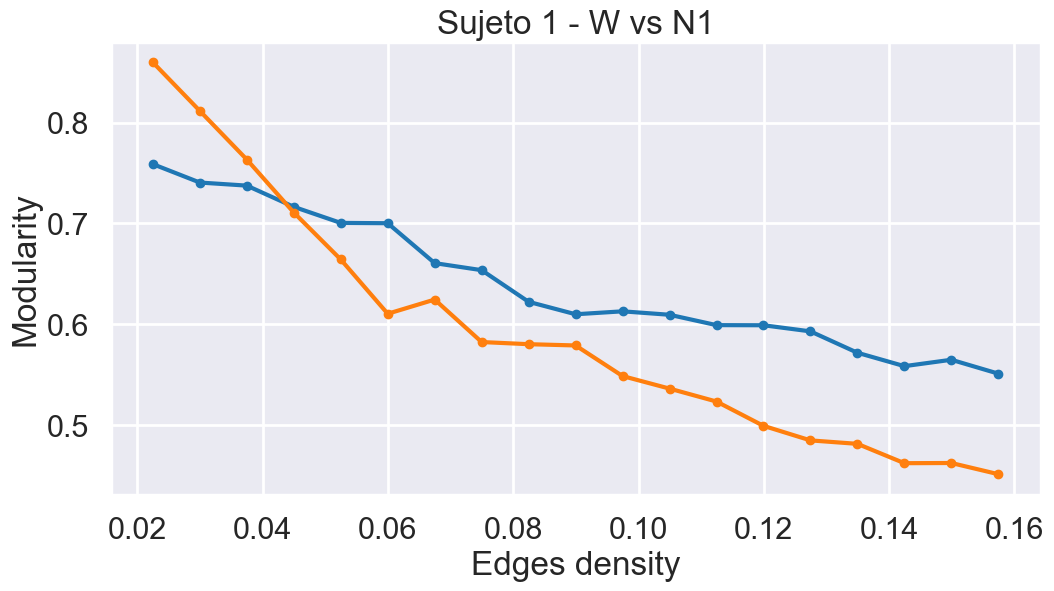

In [8]:
sort_corrs = sorted(df.values.flatten(),reverse=True)
sort_corrs_w = sorted(df_w.values.flatten(),reverse=True)
modularity = []
modularity_w = []

ds = np.arange(150,2200//2,50)
for d in ds:
    u = sort_corrs[d]
    G = nx.from_pandas_adjacency(df>=u)
    modulos = community_louvain.best_partition(G)
    modularity_ = community_louvain.modularity(modulos,G)
    modularity.append(modularity_)
    
    u_w = sort_corrs_w[d]
    G_w = nx.from_pandas_adjacency(df_w>=u_w)
    modulos = community_louvain.best_partition(G_w)
    modularity_ = community_louvain.modularity(modulos,G_w)
    modularity_w.append(modularity_)
    
plt.plot(ds/aristas_posibles,modularity,'.-')
plt.plot(ds/aristas_posibles,modularity_w,'.-')
plt.title('Sujeto 1 - W vs N1')
plt.xlabel('Edges density')
plt.ylabel('Modularity');

### Sujeto 2: N1 vs W

In [9]:
filename = '../resources/DataSujetos/N1_suj2.csv'
df = pd.read_csv(filename, header=None)
n = df.shape[0]
df -= np.diag(np.ones(n))
filename = '../resources/DataSujetos/W_suj2.csv'
df_w = pd.read_csv(filename, header=None)
df_w -= np.diag(np.ones(n))

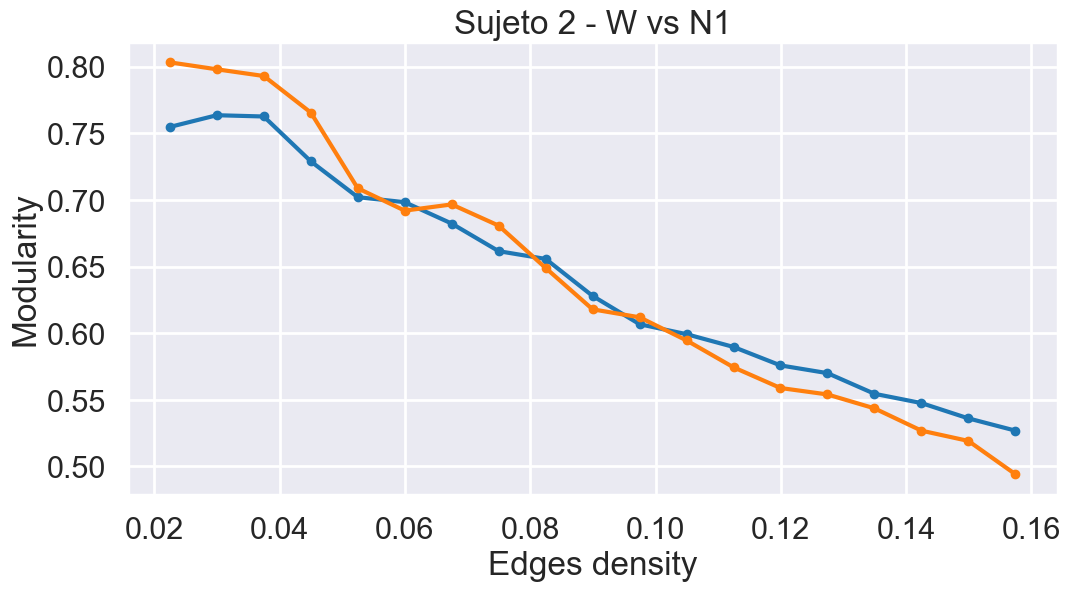

In [10]:
sort_corrs = sorted(df.values.flatten(),reverse=True)
sort_corrs_w = sorted(df_w.values.flatten(),reverse=True)
modularity = []
modularity_w = []

ds = np.arange(150,2200//2,50)
for d in ds:
    u = sort_corrs[d]
    G = nx.from_pandas_adjacency(df>=u)
    modulos = community_louvain.best_partition(G)
    modularity_ = community_louvain.modularity(modulos,G)
    modularity.append(modularity_)
    
    u_w = sort_corrs_w[d]
    G_w = nx.from_pandas_adjacency(df_w>=u_w)
    modulos = community_louvain.best_partition(G_w)
    modularity_ = community_louvain.modularity(modulos,G_w)
    modularity_w.append(modularity_)
    
plt.plot(ds/aristas_posibles,modularity,'.-')
plt.plot(ds/aristas_posibles,modularity_w,'.-')
plt.title('Sujeto 2 - W vs N1')
plt.xlabel('Edges density')
plt.ylabel('Modularity');

### Sujeto 2: N3 vs W

In [11]:
filename = '../resources/DataSujetos/N3_suj2.csv'
df = pd.read_csv(filename, header=None)
n = df.shape[0]
df -= np.diag(np.ones(n))
filename = '../resources/DataSujetos/W_suj2.csv'
df_w = pd.read_csv(filename, header=None)
df_w -= np.diag(np.ones(n))

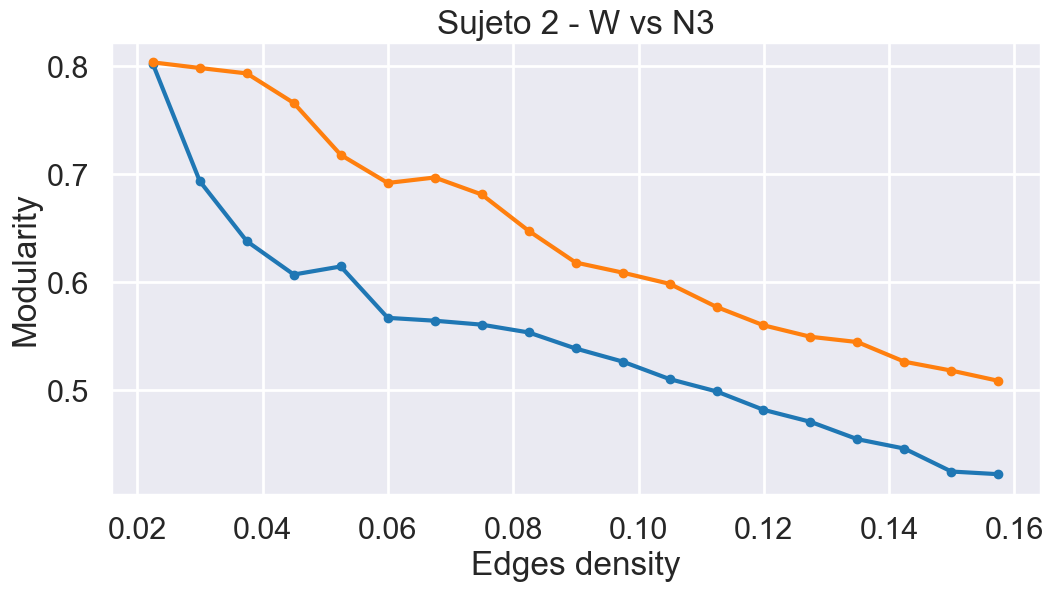

In [12]:
sort_corrs = sorted(df.values.flatten(),reverse=True)
sort_corrs_w = sorted(df_w.values.flatten(),reverse=True)
modularity = []
modularity_w = []

ds = np.arange(150,2200//2,50)
for d in ds:
    u = sort_corrs[d]
    G = nx.from_pandas_adjacency(df>=u)
    modulos = community_louvain.best_partition(G)
    modularity_ = community_louvain.modularity(modulos,G)
    modularity.append(modularity_)
    
    u_w = sort_corrs_w[d]
    G_w = nx.from_pandas_adjacency(df_w>=u_w)
    modulos = community_louvain.best_partition(G_w)
    modularity_ = community_louvain.modularity(modulos,G_w)
    modularity_w.append(modularity_)
    
plt.plot(ds/aristas_posibles,modularity,'.-')
plt.plot(ds/aristas_posibles,modularity_w,'.-')
plt.title('Sujeto 2 - W vs N3')
plt.xlabel('Edges density')
plt.ylabel('Modularity');

Text(0, 0.5, 'Number of modules')

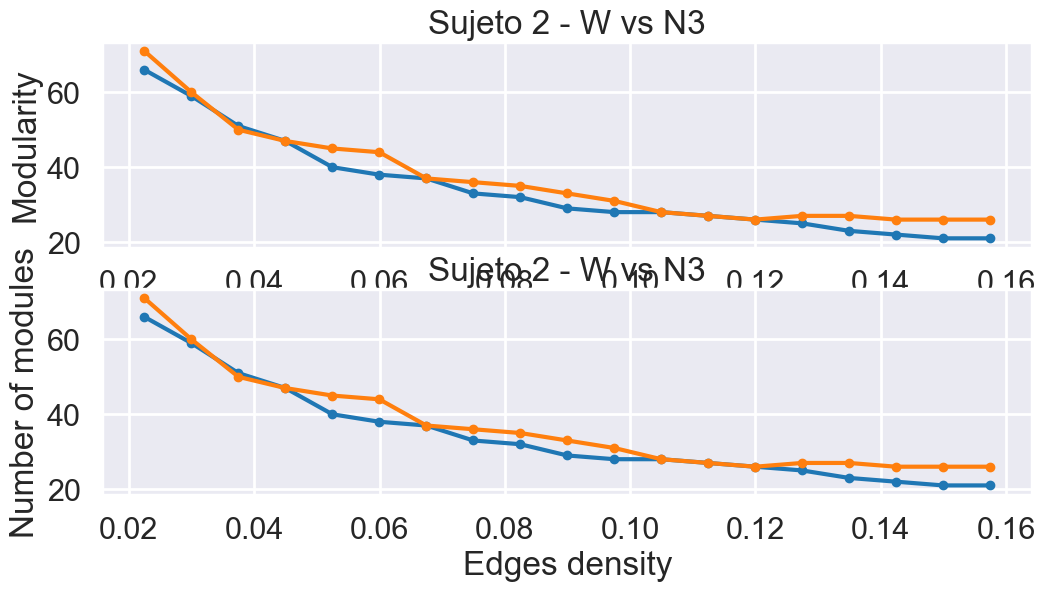

In [13]:
sort_corrs = sorted(df.values.flatten(),reverse=True)
sort_corrs_w = sorted(df_w.values.flatten(),reverse=True)
modularity = []
modularity_w = []
number_of_modules = []
number_of_modules_w = []

ds = np.arange(150,2200//2,50)
for d in ds:
    u = sort_corrs[d]
    G = nx.from_pandas_adjacency(df>=u)
    modulos = community_louvain.best_partition(G)
    modularity_ = community_louvain.modularity(modulos,G)
    modularity.append(modularity_)
    number_of_modules_ = len(set(list(modulos.values())))
    number_of_modules.append(number_of_modules_)
    
    u_w = sort_corrs_w[d]
    G_w = nx.from_pandas_adjacency(df_w>=u_w)
    modulos = community_louvain.best_partition(G_w)
    modularity_ = community_louvain.modularity(modulos,G_w)
    modularity_w.append(modularity_)
    number_of_modules_ = len(set(list(modulos.values())))
    number_of_modules_w.append(number_of_modules_)
    
plt.subplot(211)   
plt.plot(ds/aristas_posibles,number_of_modules,'.-')
plt.plot(ds/aristas_posibles,number_of_modules_w,'.-')
plt.title('Sujeto 2 - W vs N3')
plt.xlabel('Edges density')
plt.ylabel('Modularity')

plt.subplot(212)
plt.plot(ds/aristas_posibles,number_of_modules,'.-')
plt.plot(ds/aristas_posibles,number_of_modules_w,'.-')
plt.title('Sujeto 2 - W vs N3')
plt.xlabel('Edges density')
plt.ylabel('Number of modules')


Text(0, 0.5, 'Number of modules')

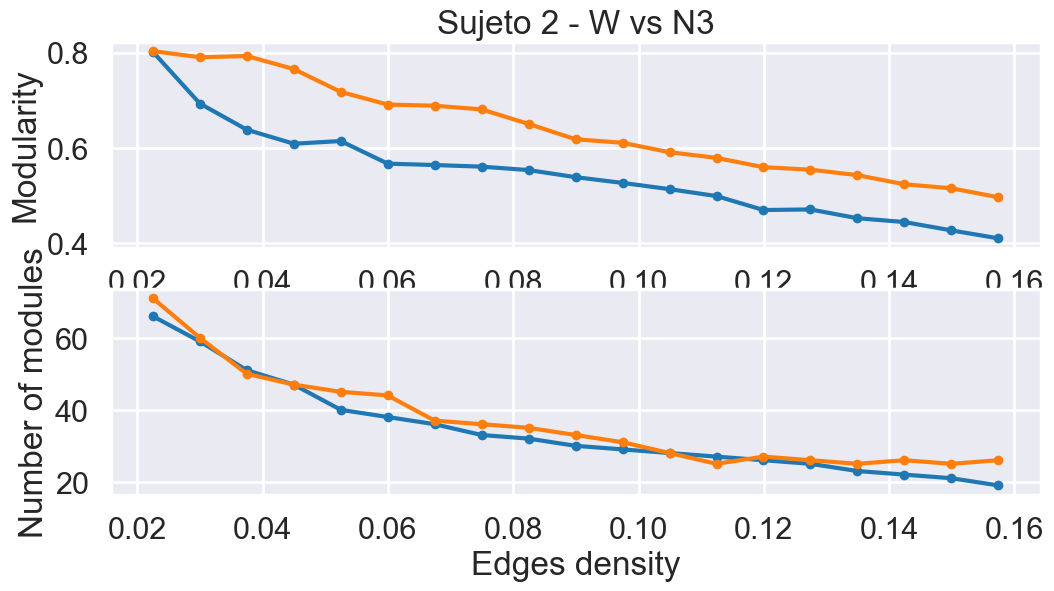

In [14]:
sort_corrs = sorted(df.values.flatten(),reverse=True)
sort_corrs_w = sorted(df_w.values.flatten(),reverse=True)
modularity = []
modularity_w = []
number_of_modules = []
number_of_modules_w = []

ds = np.arange(150,2200//2,50)
for d in ds:
    u = sort_corrs[d]
    G = nx.from_pandas_adjacency(df>=u)
    modulos = community_louvain.best_partition(G)
    modularity_ = community_louvain.modularity(modulos,G)
    modularity.append(modularity_)
    number_of_modules_ = len(set(list(modulos.values())))
    number_of_modules.append(number_of_modules_)
    
    u_w = sort_corrs_w[d]
    G_w = nx.from_pandas_adjacency(df_w>=u_w)
    modulos = community_louvain.best_partition(G_w)
    modularity_ = community_louvain.modularity(modulos,G_w)
    modularity_w.append(modularity_)
    number_of_modules_ = len(set(list(modulos.values())))
    number_of_modules_w.append(number_of_modules_)
    
plt.subplot(211)   
plt.plot(ds/aristas_posibles,modularity,'.-')
plt.plot(ds/aristas_posibles,modularity_w,'.-')
plt.title('Sujeto 2 - W vs N3')
plt.ylabel('Modularity')

plt.subplot(212)
plt.plot(ds/aristas_posibles,number_of_modules,'.-')
plt.plot(ds/aristas_posibles,number_of_modules_w,'.-')
plt.xlabel('Edges density')
plt.ylabel('Number of modules')


### Cálculo de coeficiente de modularidad y Número de módulos para cada sujeto, en función a distintas densidades

### Se definen las densidades de links a emplear

In [15]:
ds = np.arange(150,2200//2,50)

### Estadío W

In [16]:
for i in range(18):
    filename = '../resources/DataSujetos/W_suj' + str(i+1) + '.csv'
    df = pd.read_csv(filename, header=None)
    df -= np.diag(np.ones(n))
    ds = np.arange(150,2200//2,50)
    
    sort_corrs = sorted(df.values.flatten(),reverse=True)
    modularity = []
    number_of_modules = []
    
    for d in ds:
        u = sort_corrs[d]
        G = nx.from_pandas_adjacency(df>=u)
        modulos = community_louvain.best_partition(G)
        modularity_ = community_louvain.modularity(modulos,G)
        modularity.append(modularity_)
        number_of_modules_ = len(set(list(modulos.values())))
        number_of_modules.append(number_of_modules_)
    
    if i == 0:
        df_modularity_W = pd.DataFrame(modularity)
        df_number_of_modules_W = pd.DataFrame(number_of_modules)
    
    df_modularity_W.loc[:,i] = modularity
    df_number_of_modules_W.loc[:,i] = number_of_modules
    
    df_modularity_W['mean']=df_modularity_W.mean(axis=1)
    df_number_of_modules_W['mean']=df_number_of_modules_W.mean(axis=1)


### Estadío N1

In [17]:
for i in range(18):
    filename = '../resources/DataSujetos/N1_suj' + str(i+1) + '.csv'
    df = pd.read_csv(filename, header=None)
    df -= np.diag(np.ones(n))

    
    sort_corrs = sorted(df.values.flatten(),reverse=True)
    modularity = []
    number_of_modules = []
    
    for d in ds:
        u = sort_corrs[d]
        G = nx.from_pandas_adjacency(df>=u)
        modulos = community_louvain.best_partition(G)
        modularity_ = community_louvain.modularity(modulos,G)
        modularity.append(modularity_)
        number_of_modules_ = len(set(list(modulos.values())))
        number_of_modules.append(number_of_modules_)
    
    if i == 0:
        df_modularity_N1 = pd.DataFrame(modularity)
        df_number_of_modules_N1 = pd.DataFrame(number_of_modules)
    
    df_modularity_N1.loc[:,i] = modularity
    df_number_of_modules_N1.loc[:,i] = number_of_modules
    
    df_modularity_N1['mean']=df_modularity_N1.mean(axis=1)
    df_number_of_modules_N1['mean']=df_number_of_modules_N1.mean(axis=1)

  

Text(0, 0.5, 'Number of modules')

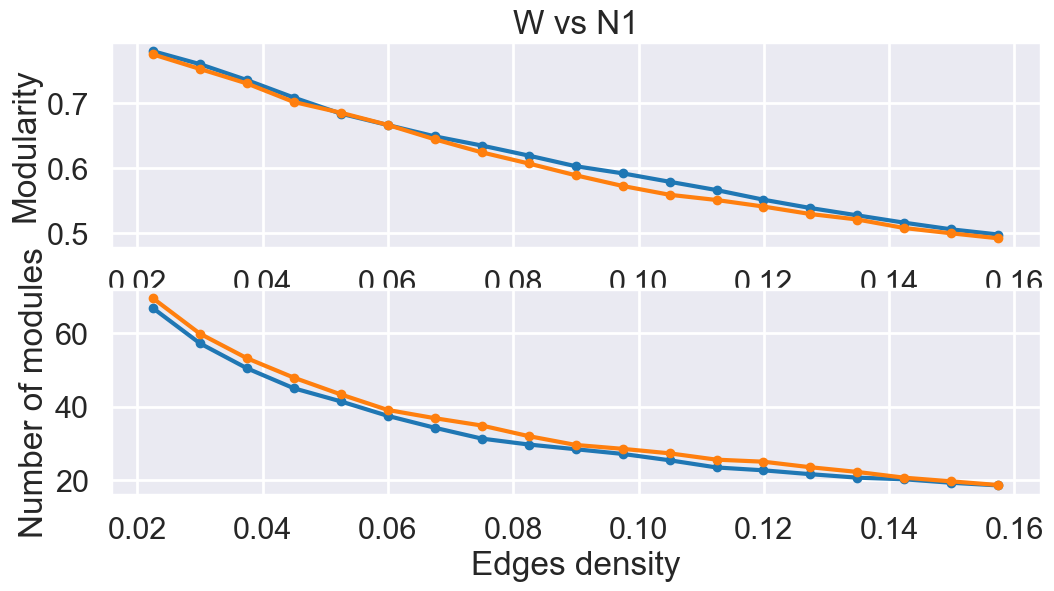

In [128]:
plt.subplot(211)   
plt.plot(ds/aristas_posibles,list(df_modularity_W['mean']),'.-')
plt.plot(ds/aristas_posibles,list(df_modularity_N1['mean']),'.-')
plt.plot(df_ttest_modularity_W_N1[1],df_ttest_modularity_W_N1[0]*0, linestyle='',marker=(6, 2, 0))
plt.title('W vs N1')
plt.ylabel('Modularity')

plt.subplot(212)
plt.plot(ds/aristas_posibles,list(df_number_of_modules_W['mean']),'.-')
plt.plot(ds/aristas_posibles,list(df_number_of_modules_N1['mean']),'.-')
plt.plot(df_ttest_number_of_modules_W_N1[1],df_ttest_number_of_modules_W_N1[0]*0, linestyle='',marker=(6, 2, 0))
plt.xlabel('Edges density')
plt.ylabel('Number of modules')


### Estadío N2

In [19]:
for i in range(18):
    filename = '../resources/DataSujetos/N2_suj' + str(i+1) + '.csv'
    df = pd.read_csv(filename, header=None)
    df -= np.diag(np.ones(n))

    
    sort_corrs = sorted(df.values.flatten(),reverse=True)
    modularity = []
    number_of_modules = []
    
    for d in ds:
        u = sort_corrs[d]
        G = nx.from_pandas_adjacency(df>=u)
        modulos = community_louvain.best_partition(G)
        modularity_ = community_louvain.modularity(modulos,G)
        modularity.append(modularity_)
        number_of_modules_ = len(set(list(modulos.values())))
        number_of_modules.append(number_of_modules_)
    
    if i == 0:
        df_modularity_N2 = pd.DataFrame(modularity)
        df_number_of_modules_N2 = pd.DataFrame(number_of_modules)
    
    df_modularity_N2.loc[:,i] = modularity
    df_number_of_modules_N2.loc[:,i] = number_of_modules
    
    df_modularity_N2['mean']=df_modularity_N2.mean(axis=1)
    df_number_of_modules_N2['mean']=df_number_of_modules_N2.mean(axis=1)

  

Text(0, 0.5, 'Number of modules')

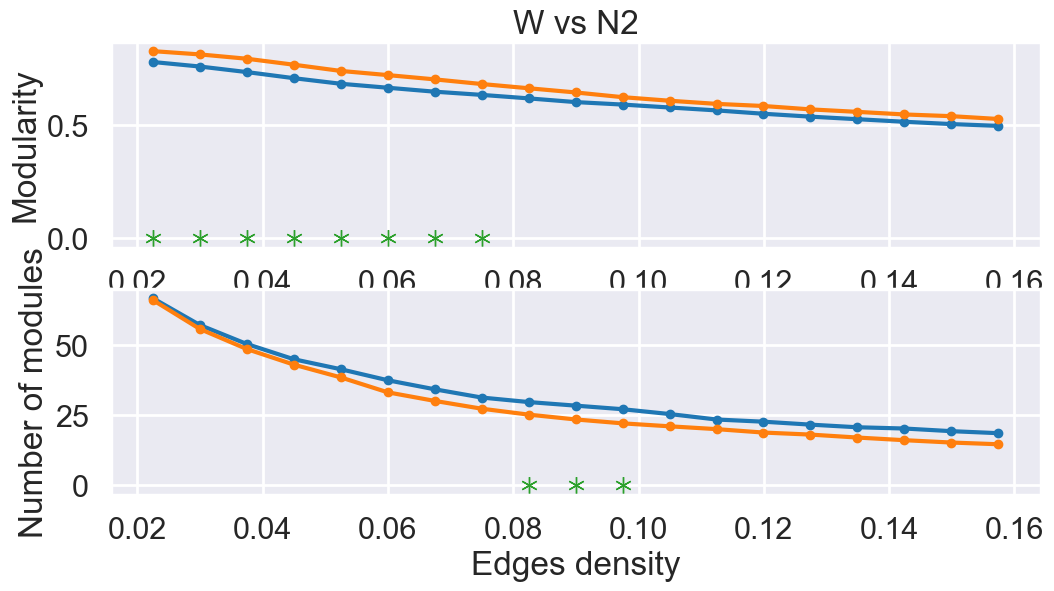

In [127]:
plt.subplot(211)   
plt.plot(ds/aristas_posibles,list(df_modularity_W['mean']),'.-')
plt.plot(ds/aristas_posibles,list(df_modularity_N2['mean']),'.-')
plt.plot(df_ttest_modularity_W_N2[1],df_ttest_modularity_W_N2[0]*0, linestyle='',marker=(6, 2, 0))
plt.title('W vs N2')
plt.ylabel('Modularity')

plt.subplot(212)
plt.plot(ds/aristas_posibles,list(df_number_of_modules_W['mean']),'.-')
plt.plot(ds/aristas_posibles,list(df_number_of_modules_N2['mean']),'.-')
plt.plot(df_ttest_number_of_modules_W_N2[1],df_ttest_number_of_modules_W_N2[0]*0, linestyle='',marker=(6, 2, 0))
plt.xlabel('Edges density')
plt.ylabel('Number of modules')


### Estadío N3

In [21]:
for i in range(18):
    filename = '../resources/DataSujetos/N3_suj' + str(i+1) + '.csv'
    df = pd.read_csv(filename, header=None)
    df -= np.diag(np.ones(n))

    
    sort_corrs = sorted(df.values.flatten(),reverse=True)
    modularity = []
    number_of_modules = []
    
    for d in ds:
        u = sort_corrs[d]
        G = nx.from_pandas_adjacency(df>=u)
        modulos = community_louvain.best_partition(G)
        modularity_ = community_louvain.modularity(modulos,G)
        modularity.append(modularity_)
        number_of_modules_ = len(set(list(modulos.values())))
        number_of_modules.append(number_of_modules_)
    
    if i == 0:
        df_modularity_N3 = pd.DataFrame(modularity)
        df_number_of_modules_N3 = pd.DataFrame(number_of_modules)
    
    df_modularity_N3.loc[:,i] = pd.DataFrame(modularity)
    df_number_of_modules_N3.loc[:,i] = number_of_modules
    
    df_modularity_N3['mean']=df_modularity_N3.mean(axis=1)
    df_number_of_modules_N3['mean']=df_number_of_modules_N3.mean(axis=1)

  

Text(0, 0.5, 'Number of modules')

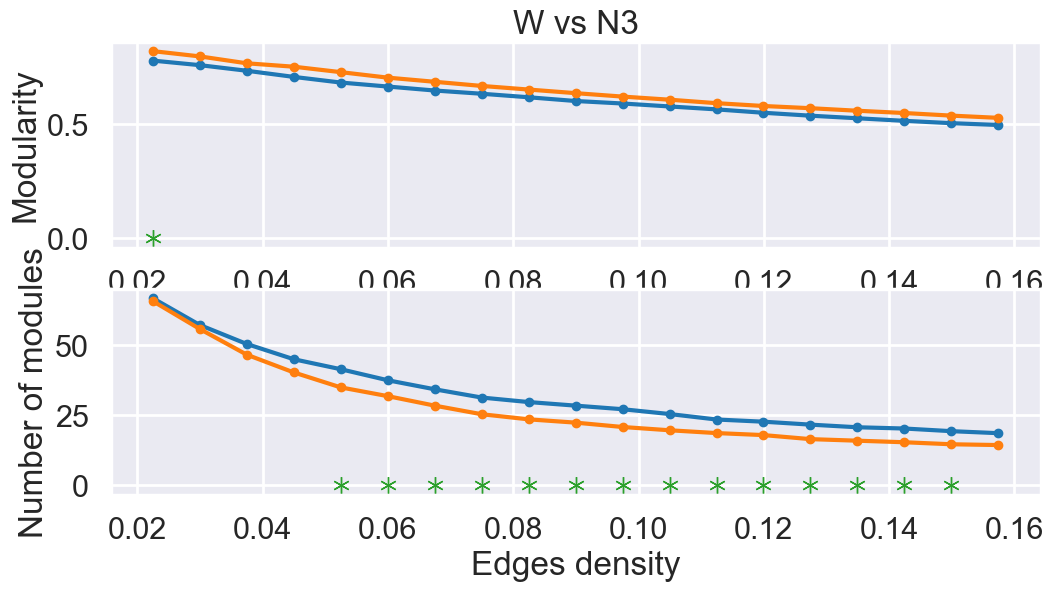

In [125]:
plt.subplot(211)   
plt.plot(ds/aristas_posibles,list(df_modularity_W['mean']),'.-')
plt.plot(ds/aristas_posibles,list(df_modularity_N3['mean']),'.-')
plt.plot(df_ttest_modularity_W_N3[1],df_ttest_modularity_W_N3[0]*0, linestyle='',marker=(6, 2, 0))
plt.title('W vs N3')
plt.ylabel('Modularity')

plt.subplot(212)
plt.plot(ds/aristas_posibles,list(df_number_of_modules_W['mean']),'.-')
plt.plot(ds/aristas_posibles,list(df_number_of_modules_N3['mean']),'.-')
plt.plot(df_ttest_number_of_modules_W_N3[1],df_ttest_number_of_modules_W_N3[0]*0, linestyle='',marker=(6, 2, 0))
plt.xlabel('Edges density')
plt.ylabel('Number of modules')


In [87]:
(ds/aristas_posibles)*list(ttest_number_of_modules_W_N3[0])

array([0.        , 0.        , 0.        , 0.        , 0.05247376,
       0.05997001, 0.06746627, 0.07496252, 0.08245877, 0.08995502,
       0.09745127, 0.10494753, 0.11244378, 0.11994003, 0.12743628,
       0.13493253, 0.14242879, 0.14992504, 0.        ])

In [85]:
list(ttest_number_of_modules_W_N3[0])

[False,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False]

### Cálculo estadístico (obtengo p-values para cada estadío, modularidad y número de módulos

In [73]:
# Set con la cantidad de sujetos
l1 = {0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17}

In [117]:
ttest_modularity_W_N1 = pd.DataFrame(stats.ttest_ind(df_modularity_W.loc[:,l1], df_modularity_N1.loc[:,l1], axis=1)[1])
ttest_modularity_W_N1.loc[:,1]=(ds/aristas_posibles)
df_ttest_modularity_W_N1 = ttest_modularity_W_N1.loc[ttest_modularity_W_N1[0]<=0.05,:]
df_ttest_modularity_W_N1

,0,1


In [118]:
ttest_modularity_W_N2 = pd.DataFrame(stats.ttest_ind(df_modularity_W.loc[:,l1], df_modularity_N2.loc[:,l1], axis=1)[1])
ttest_modularity_W_N2.loc[:,1]=(ds/aristas_posibles)
df_ttest_modularity_W_N2 = ttest_modularity_W_N2.loc[ttest_modularity_W_N2[0]<=0.05,:]
df_ttest_modularity_W_N2

,0,1
0,0.012031,0.022489
1,0.005159,0.029985
2,0.006576,0.037481
3,0.007639,0.044978
4,0.016091,0.052474
5,0.018300,0.059970
6,0.022485,0.067466
7,0.042415,0.074963


In [119]:
ttest_modularity_W_N3 =  pd.DataFrame(stats.ttest_ind(df_modularity_W.loc[:,l1], df_modularity_N3.loc[:,l1], axis=1)[1])
ttest_modularity_W_N3.loc[:,1]=(ds/aristas_posibles)
df_ttest_modularity_W_N3 = ttest_modularity_W_N3.loc[ttest_modularity_W_N3[0]<=0.05,:]
df_ttest_modularity_W_N3

,0,1
0,0.026536,0.022489


In [121]:
ttest_number_of_modules_W_N1 = pd.DataFrame(stats.ttest_ind(df_number_of_modules_W.loc[:,l1], df_number_of_modules_N1.loc[:,l1], axis=1)[1])
ttest_number_of_modules_W_N1.loc[:,1]=(ds/aristas_posibles)
df_ttest_number_of_modules_W_N1 = ttest_number_of_modules_W_N1.loc[ttest_number_of_modules_W_N1[0]<=0.05,:]
df_ttest_number_of_modules_W_N1

,0,1


In [122]:
ttest_number_of_modules_W_N2 = pd.DataFrame(stats.ttest_ind(df_number_of_modules_W.loc[:,l1], df_number_of_modules_N2.loc[:,l1], axis=1)[1])
ttest_number_of_modules_W_N2.loc[:,1]=(ds/aristas_posibles)
df_ttest_number_of_modules_W_N2 = ttest_number_of_modules_W_N2.loc[ttest_number_of_modules_W_N2[0]<=0.05,:]
df_ttest_number_of_modules_W_N2

,0,1
8,0.049738,0.082459
9,0.034994,0.089955
10,0.031613,0.097451


In [124]:
ttest_number_of_modules_W_N3 =  pd.DataFrame(stats.ttest_ind(df_number_of_modules_W.loc[:,l1], df_number_of_modules_N3.loc[:,l1], axis=1)[1])
ttest_number_of_modules_W_N3.loc[:,1]=(ds/aristas_posibles)
df_ttest_number_of_modules_W_N3 = ttest_number_of_modules_W_N3.loc[ttest_number_of_modules_W_N3[0]<=0.05,:]
df_ttest_number_of_modules_W_N3

,0,1
4,0.026285,0.052474
5,0.039071,0.059970
6,0.033397,0.067466
7,0.018932,0.074963
8,0.018366,0.082459
9,0.020298,0.089955
10,0.012064,0.097451
11,0.022960,0.104948
12,0.036994,0.112444
13,0.037276,0.119940
